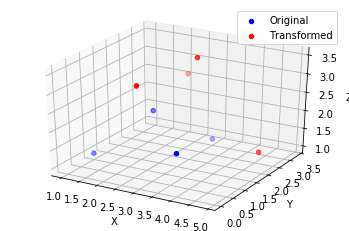

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

points = np.array([
    [1, 1, 1],
    [2, 2, 2],
    [3, 3, 1],
    [4, 0, 2]
])

# Translation
tx, ty, tz = 2, -1, 3

# Rotation angles
theta_x = np.radians(30)
theta_y = np.radians(45)
theta_z = np.radians(60)

# Rotation matrices
Rx = np.array([
    [1, 0, 0, 0],
    [0, np.cos(theta_x), -np.sin(theta_x), 0],
    [0, np.sin(theta_x), np.cos(theta_x), 0],
    [0, 0, 0, 1]
])

Ry = np.array([
    [np.cos(theta_y), 0, np.sin(theta_y), 0],
    [0, 1, 0, 0],
    [-np.sin(theta_y), 0, np.cos(theta_y), 0],
    [0, 0, 0, 1]
])

Rz = np.array([
    [np.cos(theta_z), -np.sin(theta_z), 0, 0],
    [np.sin(theta_z), np.cos(theta_z), 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Translation matrix
T = np.array([
    [1, 0, 0, tx],
    [0, 1, 0, ty],
    [0, 0, 1, tz],
    [0, 0, 0, 1]
])

HTM = T @ Rz @ Ry @ Rx

points_h = np.hstack((points, np.ones((points.shape[0], 1))))

# transformation
transformed_points_h = (HTM @ points_h.T).T
transformed_points = transformed_points_h[:, :3]  # drop the last column

# plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], c='b', label='Original')
ax.scatter(transformed_points[:,0], transformed_points[:,1], transformed_points[:,2], c='r', label='Transformed')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()
